In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
from numpy import *
from scipy.interpolate import CubicSpline
import pandas as pd

# Example 1

In [8]:
def ftion(x):
    return sin(2*pi*x)

def compute_line(xs, coeffs):
    summa = zeros(len(xs))
    for i, coeff in enumerate(coeffs[::-1]):
        summa += coeff*xs**i
    return summa

npr.seed(3)
n = 10
xs = npr.uniform(0,1, size=n)
ys = sin(2*pi*xs) + npr.normal(0, 0.3, size=n)

df = pd.DataFrame(ys, columns=['ys'])
df['xs'] = xs
df.sort_values(by='xs', inplace=True)

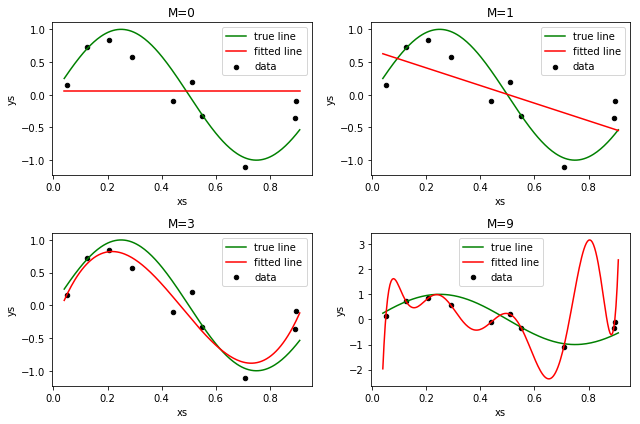

In [9]:
Ms = [0,1,3,9]

fig, axes = plt.subplots(2,2,figsize=(9,6))
axes = axes.ravel()

dom = linspace(0.04,0.91, 200)

for ax, M in zip(axes, Ms):
    df.plot('xs', 'ys', kind='scatter', ax=ax, label='data', color='k')
    ax.plot(dom, ftion(dom), label='true line', color='g')
    
    coeffs = polyfit(df['xs'], df['ys'], deg=M)
    ax.plot(dom, compute_line(dom, coeffs), label='fitted line', color='r')
    ax.legend()
    ax.set_title(f'M={M}')
#     ax.set_xlim(0,0.9)
    
plt.tight_layout()
plt.show()

# Optimization

In [41]:
from sklearn.datasets import make_regression
from scipy.optimize import minimize, newton

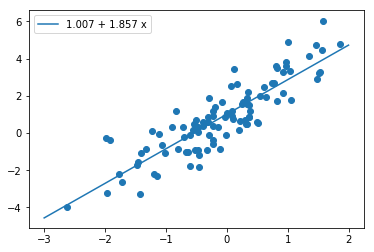

In [40]:
α = 1
β = 2
n = 100
npr.seed(42)
xs = npr.normal(size=n)
ys = α + β*xs + npr.normal(size=n)

b,a = polyfit(xs,ys,deg=1)

dom = linspace(-3,2)

plt.scatter(xs,ys)
plt.plot(dom, a+b*dom, label=f'{a:.3f} + {b:.3f} x')
plt.legend()
plt.show()

In [43]:
def fun(w, xs, t):
    sq_err = (t - w[0] - w[1]*xs)**2
    return sq_err.sum()

res = minimize(lambda w: fun(w, xs,ys), x0=[0,0])
print(res.x)

[1.00742782 1.85674284]


TypeError: can't multiply sequence by non-int of type 'float'